In [1]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_dir = r'C:\Users\haris\AI\ML\Projects\Data\Cars Dataset'

img_size = (224, 224)
batch_size = 32

def load_and_preprocess_data(subdir_name):
    images = []
    labels = []
    
    class_counts = {}

    class_folders = os.listdir(os.path.join(data_dir, subdir_name))
    num_classes = len(class_folders)

    for class_index, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, subdir_name, class_folder)
        num_samples = len(os.listdir(class_path))
        class_counts[class_folder] = num_samples

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = load_img(image_path, target_size=img_size)
            img_array = img_to_array(img)
            img_array /= 255.0
            images.append(img_array)
            labels.append(class_index)
    images = np.array(images)
    labels = to_categorical(labels, num_classes=num_classes)

    print("Class Representation:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} samples")

    return images, labels, num_classes

Class Representation:
Audi: 814 samples
Hyundai Creta: 271 samples
Mahindra Scorpio: 316 samples
Rolls Royce: 311 samples
Swift: 424 samples
Tata Safari: 441 samples
Toyota Innova: 775 samples
Epoch 1/10
80/80 [==============================] - 10s 58ms/step - loss: 0.8390 - accuracy: 0.7173 - val_loss: 0.5337 - val_accuracy: 0.8251
Epoch 2/10
80/80 [==============================] - 3s 43ms/step - loss: 0.3172 - accuracy: 0.9000 - val_loss: 0.4646 - val_accuracy: 0.8448
Epoch 3/10
80/80 [==============================] - 3s 43ms/step - loss: 0.1639 - accuracy: 0.9531 - val_loss: 0.3939 - val_accuracy: 0.8732
Epoch 4/10
80/80 [==============================] - 3s 43ms/step - loss: 0.1002 - accuracy: 0.9748 - val_loss: 0.4940 - val_accuracy: 0.8608
Epoch 5/10
80/80 [==============================] - 3s 43ms/step - loss: 0.0550 - accuracy: 0.9902 - val_loss: 0.3776 - val_accuracy: 0.8744
Epoch 6/10
80/80 [==============================] - 3s 44ms/step - loss: 0.0351 - accuracy: 0.9965 - 

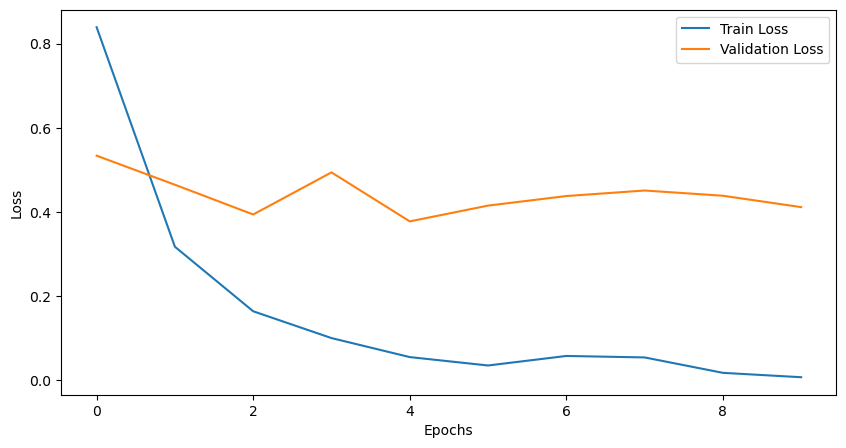

In [3]:
images, labels, num_classes = load_and_preprocess_data('train')
train_images, valid_images, train_labels, valid_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    validation_data=(valid_images, valid_labels),
    batch_size=batch_size,
    epochs=10, 
)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
test_images, test_labels, num_classes = load_and_preprocess_data('test')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Class Representation:
Audi: 199 samples
Hyundai Creta: 67 samples
Mahindra Scorpio: 75 samples
Rolls Royce: 74 samples
Swift: 102 samples
Tata Safari: 106 samples
Toyota Innova: 190 samples
26/26 [==============================] - 16s 608ms/step - loss: 0.3469 - accuracy: 0.8967
Test Loss: 0.3469196856021881
Test Accuracy: 0.8966789841651917
